# Research Paper
AI-driven classification task to predict the presence of heart disease.

### Install required Python libraries

In [3]:
# Install ucimlrepo if not already installed
!pip install ucimlrepo

In [4]:
# Install ucimlrepo if not already installed
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Fetching dataset for AI in healthcare classification (e.g., Heart Disease Cleveland)
# This is retrieved from UCI ML Repository.
heart_disease = fetch_ucirepo(id=45)

# Data
X = heart_disease.data.features # These are the patient features
y = heart_disease.data.targets

# Display basic information
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nValue counts for target variable (y):")
print(y.value_counts())


# Create a *copy* of y before modifying it to ensure you're working on independent data.
y = y.copy()
y[y > 0] = 1

print("\nProcessed target value counts (binary):")
print(y.value_counts())



Features (X) shape: (303, 13)
Target (y) shape: (303, 1)

First 5 rows of X:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Value counts for target variable (y):
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

Processed target value counts (binary):
num
0      164
1      139
Name: count, dtype: int64


### Check for missing values

### Subtask:
Identify and handle any missing data in the features and target variables.


**Reasoning**:
Check for missing values in both X and y DataFrames and display the counts to identify which columns have missing data.



In [5]:
print("Missing values in X:")
print(X.isnull().sum())

print("\nMissing values in y:")
print(y.isnull().sum())

Missing values in X:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in y:
num    0
dtype: int64


**Reasoning**:
Based on the missing value counts, the target variable y has no missing values, but the features X have missing values in 'ca' and 'thal' columns. Imputing with the mode is a reasonable strategy for these categorical/ordinal features, as it preserves the distribution better than mean/median for non-continuous data, especially when the number of missing values is small relative to the dataset size.



In [6]:
# Impute missing values in 'ca' and 'thal' columns of X with the mode
for col in ['ca', 'thal']:
    mode_value = X[col].mode()[0]
    X[col].fillna(mode_value, inplace=True)

# Verify that missing values have been handled
print("Missing values in X after imputation:")
print(X.isnull().sum())

print("\nMissing values in y after handling (should be 0):")
print(y.isnull().sum())

Missing values in X after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Missing values in y after handling (should be 0):
num    0
dtype: int64


<ipython-input-6-1794788417>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mode_value, inplace=True)
<ipython-input-6-1794788417>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_value, inplace=True)


> ### Visualize data distribution:
Following code is used to Create visualizations (e.g., histograms, box plots) to understand the distribution of individual features.
histograms and box plots to visualize their distributions and identify outliers.


**Reasoning**:
Select representative numerical features and create



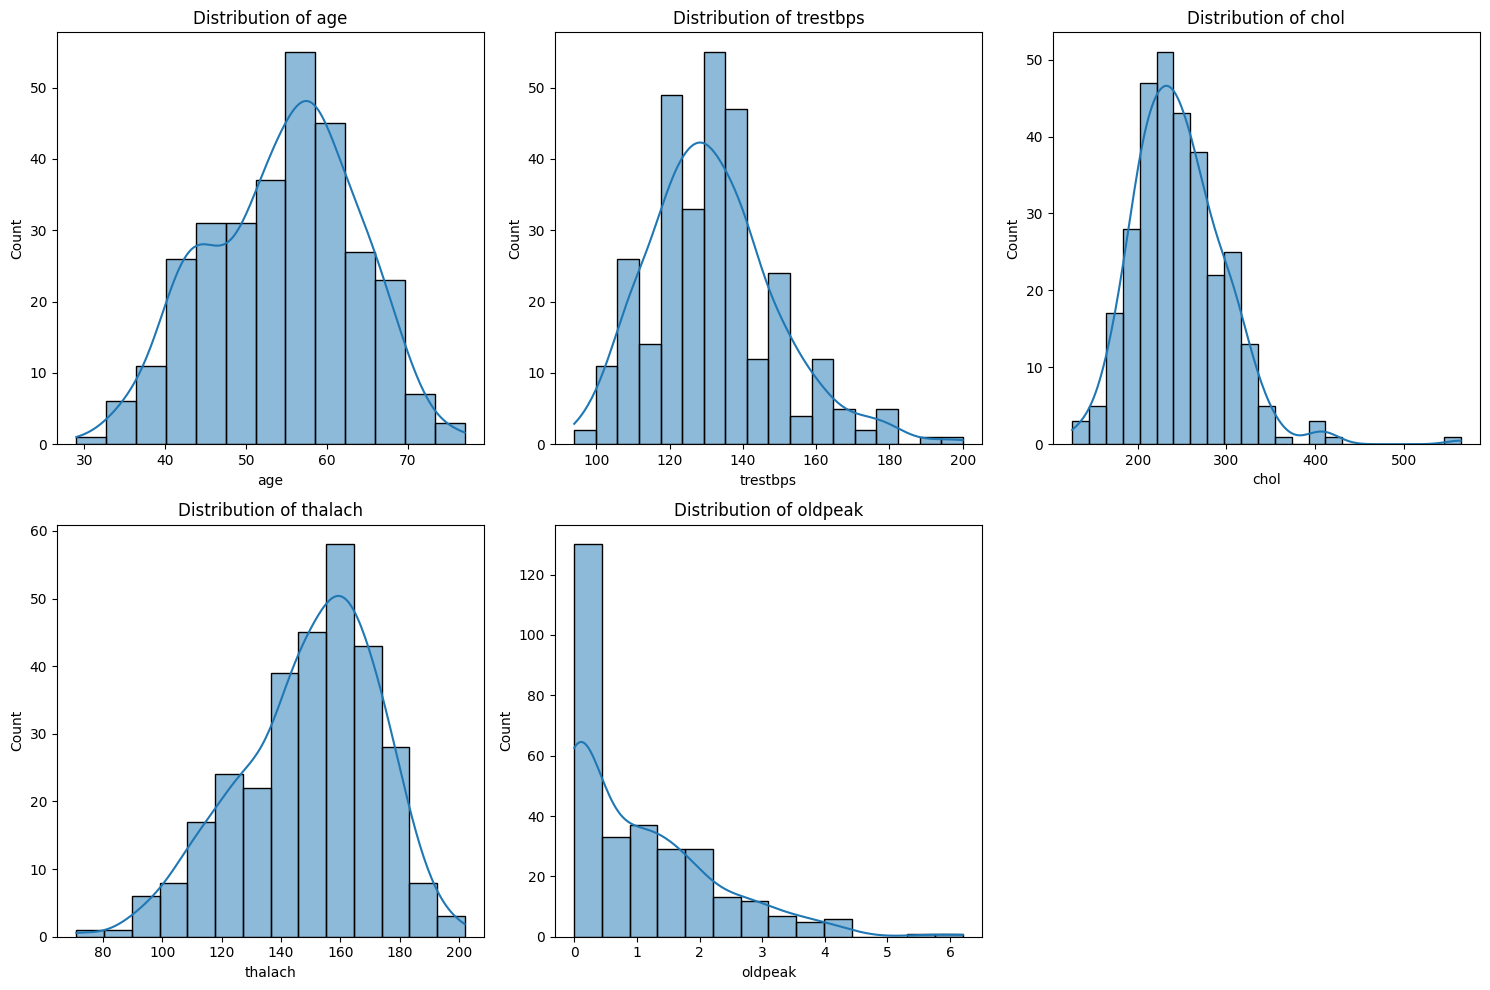

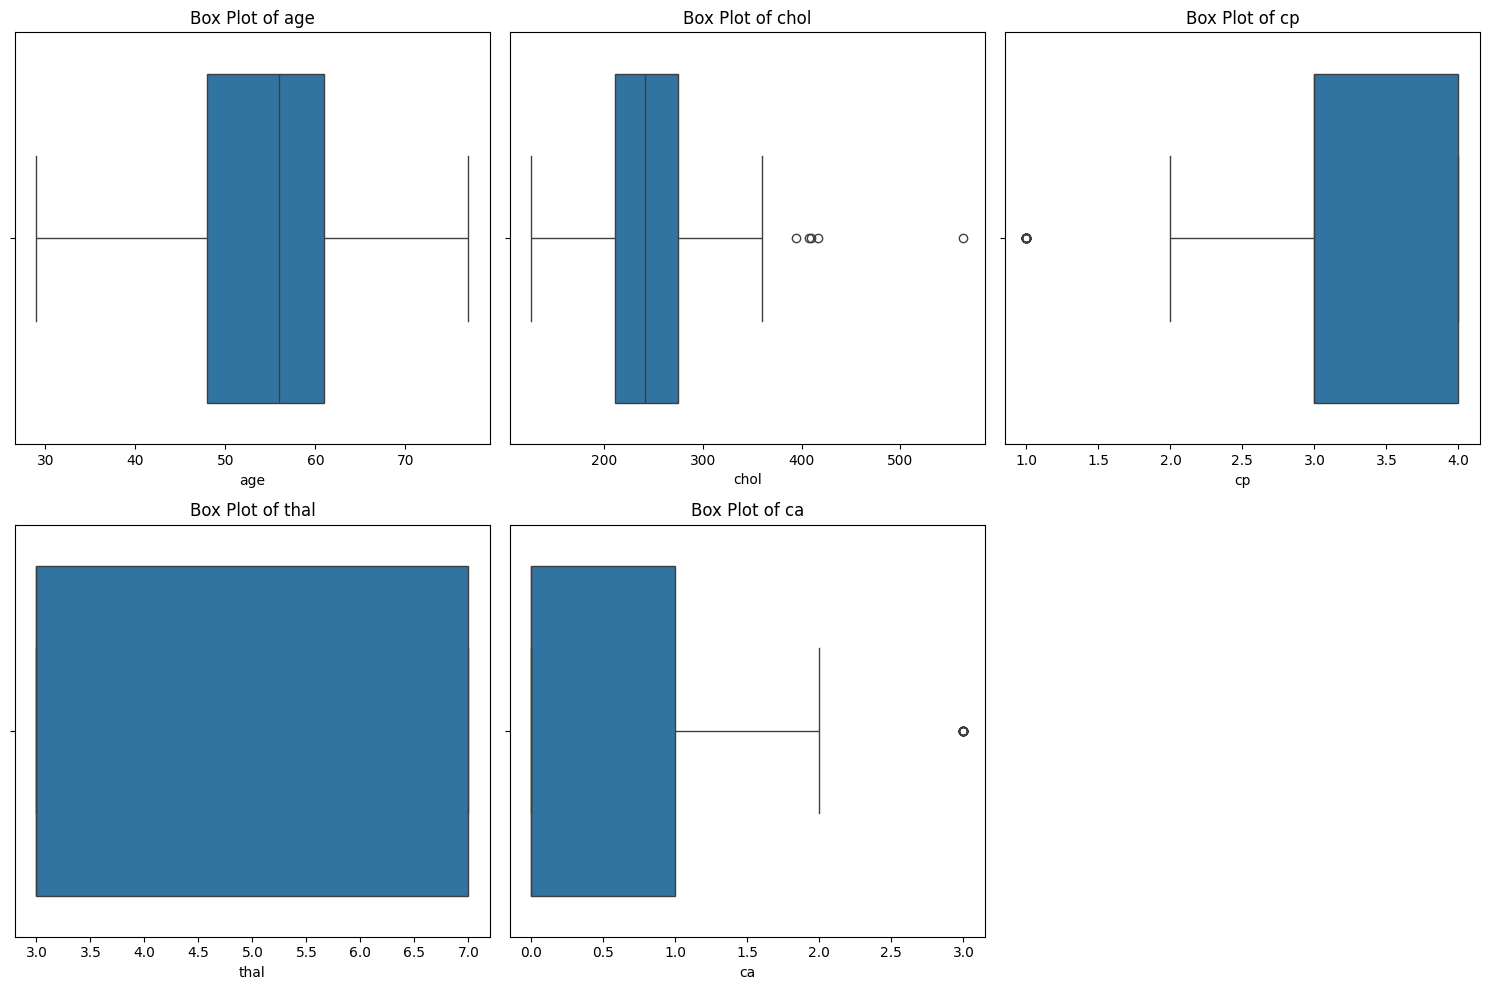

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few representative numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Select a few features for box plots (numerical or categorical)
# Including some potentially categorical features treated as numerical in X
boxplot_features = ['age', 'chol', 'cp', 'thal', 'ca']

# Create box plots for selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(boxplot_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=X[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

## Visualize relationships

### Subtask:
Create visualizations (e.g., scatter plots, correlation matrix heatmap) to explore relationships between features and the target variable.


**Reasoning**:
Create a correlation matrix including features and the target variable, then generate a heatmap to visualize the correlations.



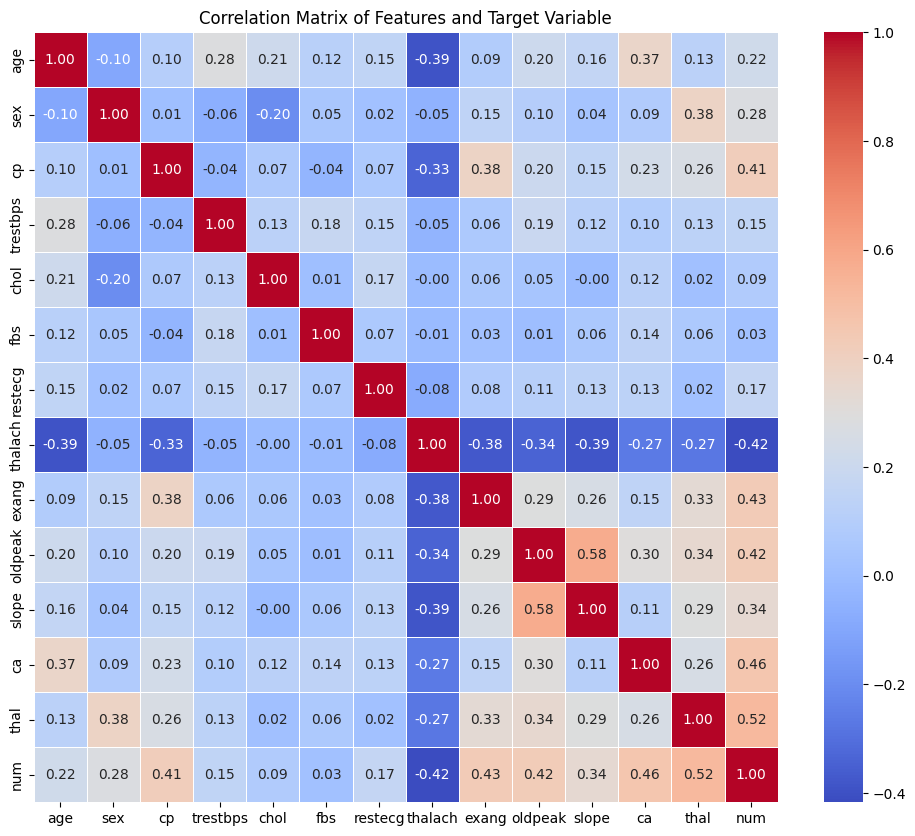

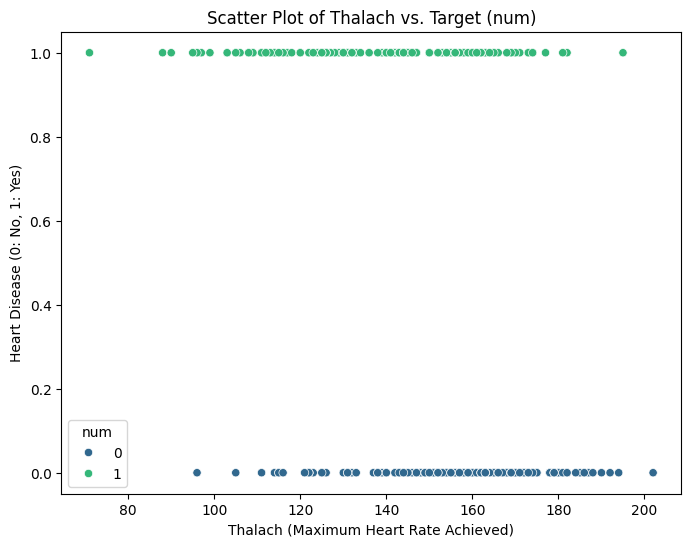

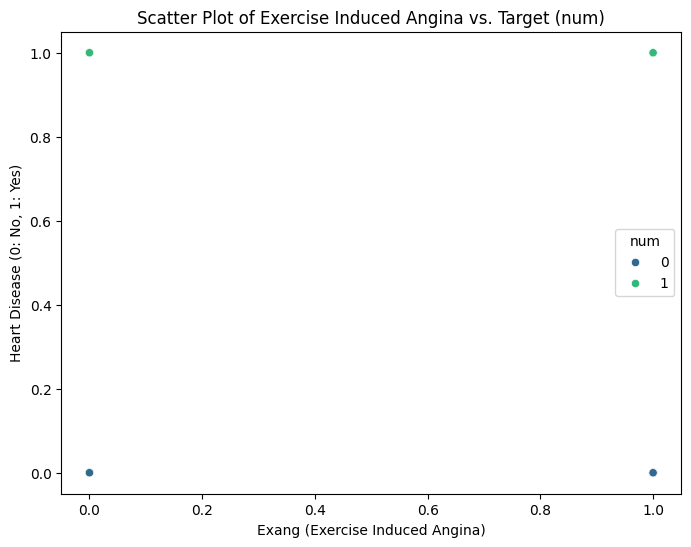

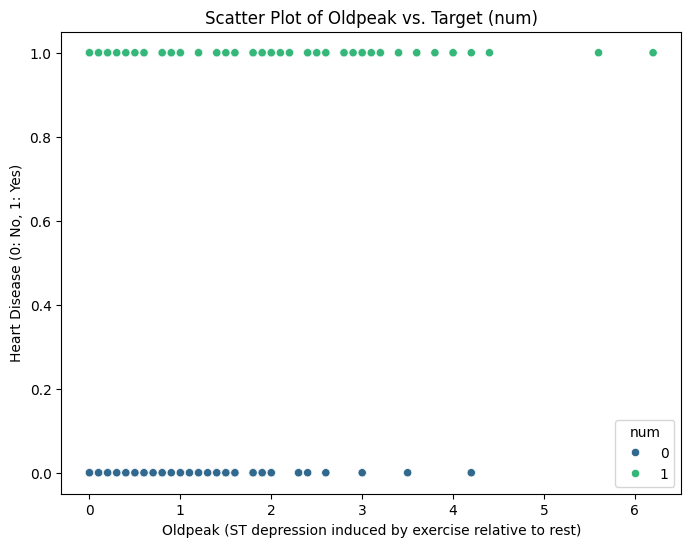

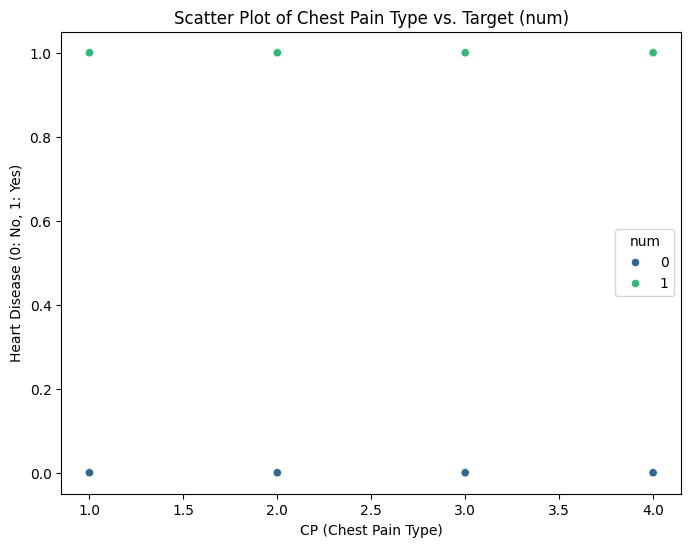

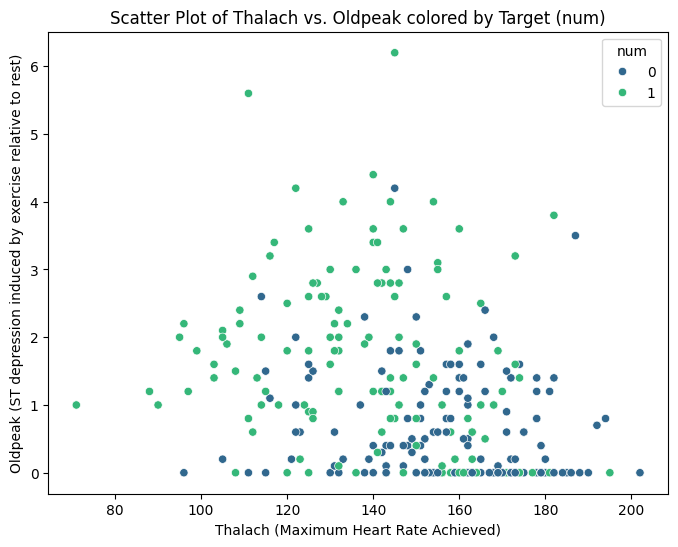

In [7]:
# 1. Create a correlation matrix including features and the target variable
# Concatenate X and y for correlation calculation
df_corr = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# 2. Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

# 3. Create scatter plots for interesting correlations
# Based on the heatmap, let's pick a few pairs:
# - thalach vs num (positive correlation with target)
# - exang vs num (negative correlation with target)
# - oldpeak vs num (negative correlation with target)
# - cp vs num (positive correlation with target)
# - thalach vs oldpeak (potentially interesting relationship between features)

# Scatter plot: thalach vs num
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='thalach', y='num', hue='num', palette='viridis', legend='full')
plt.title('Scatter Plot of Thalach vs. Target (num)')
plt.xlabel('Thalach (Maximum Heart Rate Achieved)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

# Scatter plot: exang vs num
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='exang', y='num', hue='num', palette='viridis', legend='full')
plt.title('Scatter Plot of Exercise Induced Angina vs. Target (num)')
plt.xlabel('Exang (Exercise Induced Angina)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

# Scatter plot: oldpeak vs num
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='oldpeak', y='num', hue='num', palette='viridis', legend='full')
plt.title('Scatter Plot of Oldpeak vs. Target (num)')
plt.xlabel('Oldpeak (ST depression induced by exercise relative to rest)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

# Scatter plot: cp vs num
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='cp', y='num', hue='num', palette='viridis', legend='full')
plt.title('Scatter Plot of Chest Pain Type vs. Target (num)')
plt.xlabel('CP (Chest Pain Type)')
plt.ylabel('Heart Disease (0: No, 1: Yes)')
plt.show()

# Scatter plot: thalach vs oldpeak
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_corr, x='thalach', y='oldpeak', hue='num', palette='viridis', legend='full')
plt.title('Scatter Plot of Thalach vs. Oldpeak colored by Target (num)')
plt.xlabel('Thalach (Maximum Heart Rate Achieved)')
plt.ylabel('Oldpeak (ST depression induced by exercise relative to rest)')
plt.show()

In [8]:
# Combine X and y for easier preprocessing, then separate later
df = pd.concat([X, y], axis=1)

# Identify categorical and numerical columns for appropriate AI data preparation
# Assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' might be categorical or need special handling
# Let's inspect unique values to confirm:
for col in X.columns:
    if X[col].dtype == 'object': # Check for object type as it indicates strings/categories
        print(f"Column '{col}' is object type. Unique values: {X[col].unique()}")
    elif X[col].nunique() < 20: # Heuristic for potentially categorical numerical columns
        print(f"Column '{col}' has {X[col].nunique()} unique values. Unique values: {X[col].unique()}")

# Based on common Heart Disease dataset understanding, 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are often treated as categorical
# Some datasets might have 'ca' and 'thal' with '?' as missing values. Let's explicitly handle.
# Replace '?' with NaN and then handle NaNs
for col in ['ca', 'thal']:
    if col in df.columns:
        df[col] = df[col].replace('?', np.nan)

# Convert all relevant columns to numeric, forcing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values: Common strategies include imputation (mean, median, mode) or dropping.
# For simplicity, let's fill with the mean for numerical features.
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object': # If still object after coerce, convert to numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].isnull().any(): # Check again after coercing
            df[col] = df[col].fillna(df[col].mean()) # Fill with mean for numerical, or mode for categorical

# Separate features (X_processed) and target (y_processed)
target_column = y.columns[0]
X_processed = df.drop(columns=[target_column])
y_processed = df[target_column]

# Feature Scaling for numerical features
# Identify numerical columns after initial processing
numerical_cols_processed = X_processed.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_processed[numerical_cols_processed] = scaler.fit_transform(X_processed[numerical_cols_processed])

print("\nFirst 5 rows of processed X (clinical features):")
print(X_processed.head())
print("\nProcessed target (diagnosis) value counts:")
print(y_processed.value_counts())

Column 'sex' has 2 unique values. Unique values: [1 0]
Column 'cp' has 4 unique values. Unique values: [1 4 3 2]
Column 'fbs' has 2 unique values. Unique values: [1 0]
Column 'restecg' has 3 unique values. Unique values: [2 0 1]
Column 'exang' has 2 unique values. Unique values: [0 1]
Column 'slope' has 3 unique values. Unique values: [3 2 1]
Column 'ca' has 4 unique values. Unique values: [0. 3. 2. 1.]
Column 'thal' has 3 unique values. Unique values: [6. 3. 7.]

First 5 rows of processed X (clinical features):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [10]:
print("\n--- Training Logistic Regression Model (AI Classifier for Diagnosis) ---")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)


--- Training Logistic Regression Model (AI Classifier for Diagnosis) ---


In [11]:
print("\n--- Training k-Nearest Neighbors Model (AI Classifier for Diagnosis) ---")
# Choosing k=5 as a common starting point, can be tuned based on performance
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


--- Training k-Nearest Neighbors Model (AI Classifier for Diagnosis) ---


In [12]:
print("\n--- Training Decision Tree Model (AI Classifier for Diagnosis) ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


--- Training Decision Tree Model (AI Classifier for Diagnosis) ---


In [13]:
print("\n--- AI Model Evaluation for Healthcare Diagnostics ---")

# Define target names for better interpretability (0: No Disease, 1: Disease)
target_names = ['No Disease', 'Disease']

# Logistic Regression Evaluation
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=target_names))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# k-NN Evaluation
print("\nk-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=target_names))
print("k-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

# Decision Tree Evaluation
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


--- AI Model Evaluation for Healthcare Diagnostics ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

  No Disease       0.93      0.82      0.87        33
     Disease       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Logistic Regression Accuracy: 0.8688524590163934

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

  No Disease       0.96      0.79      0.87        33
     Disease       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

k-Nearest Neighbors Accuracy: 0.8688524590163934

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Diseas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
# Assuming y_test, y_pred_lr, y_pred_knn, y_pred_dt are available from previous steps

# --- Model Evaluation (as before, but capture reports) ---

print("\n--- AI Model Evaluation for Healthcare Diagnostics ---")

# Define target names for better interpretability (0: No Disease, 1: Disease)
target_names = ['No Disease', 'Disease']

# Logistic Regression Evaluation
print("\nLogistic Regression Classification Report:")
lr_report = classification_report(y_test, y_pred_lr, target_names=target_names, output_dict=True)
print(classification_report(y_test, y_pred_lr, target_names=target_names)) # Print for readability
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)

# k-NN Evaluation
print("\nk-Nearest Neighbors Classification Report:")
knn_report = classification_report(y_test, y_pred_knn, target_names=target_names, output_dict=True)
print(classification_report(y_test, y_pred_knn, target_names=target_names)) # Print for readability
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)

# Decision Tree Evaluation
print("\nDecision Tree Classification Report:")
dt_report = classification_report(y_test, y_pred_dt, target_names=target_names, output_dict=True)
print(classification_report(y_test, y_pred_dt, target_names=target_names)) # Print for readability
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# --- NEW: Comparison Matrix (DataFrame) and Visualization ---

print("\n--- Model Comparison ---")

# Extract relevant metrics for comparison (using 'weighted avg' for overall performance)
metrics = {
    'Model': ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [lr_accuracy, knn_accuracy, dt_accuracy],
    'Precision (Weighted Avg)': [lr_report['weighted avg']['precision'], knn_report['weighted avg']['precision'], dt_report['weighted avg']['precision']],
    'Recall (Weighted Avg)': [lr_report['weighted avg']['recall'], knn_report['weighted avg']['recall'], dt_report['weighted avg']['recall']],
    'F1-Score (Weighted Avg)': [lr_report['weighted avg']['f1-score'], knn_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score']]
}

comparison_df = pd.DataFrame(metrics)
print("\nComparison of AI Classifier Performance (Weighted Averages):")
print(comparison_df.round(3)) # Round for cleaner display

# --- Visualization ---

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Melt the DataFrame for easier plotting with seaborn
df_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, palette='viridis')
plt.title('Comparison of AI Classification Model Performance in Healthcare', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0.0, 1.0) # Metrics are usually between 0 and 1
plt.legend(title='AI Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Detailed Class-wise Comparison (Optional but highly recommended for healthcare) ---")

# For healthcare, it's crucial to look at individual class performance (e.g., Recall for 'Disease')
# Let's create a DataFrame for specific class metrics, focusing on 'Disease' class recall/precision
disease_metrics = {
    'Model': ['Logistic Regression', 'k-Nearest Neighbors', 'Decision Tree'],
    'Precision (No Disease)': [lr_report['No Disease']['precision'], knn_report['No Disease']['precision'], dt_report['No Disease']['precision']],
    'Recall (No Disease)': [lr_report['No Disease']['recall'], knn_report['No Disease']['recall'], dt_report['No Disease']['recall']],
    'F1-Score (No Disease)': [lr_report['No Disease']['f1-score'], knn_report['No Disease']['f1-score'], dt_report['No Disease']['f1-score']],
    'Precision (Disease)': [lr_report['Disease']['precision'], knn_report['Disease']['precision'], dt_report['Disease']['precision']],
    'Recall (Disease)': [lr_report['Disease']['recall'], knn_report['Disease']['recall'], dt_report['Disease']['recall']],
    'F1-Score (Disease)': [lr_report['Disease']['f1-score'], knn_report['Disease']['f1-score'], dt_report['Disease']['f1-score']]
}

disease_df = pd.DataFrame(disease_metrics)
print("\nClass-wise Performance Comparison (AI Classifiers):")
print(disease_df.round(3))

# Optional: Visualize class-wise metrics
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
df_disease_melted = disease_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=df_disease_melted, palette='coolwarm')
plt.title('Class-Wise Performance Comparison of AI Models for Heart Disease', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


--- AI Model Evaluation for Healthcare Diagnostics ---

Logistic Regression Classification Report:


NameError: name 'y_test' is not defined